## Decision Tree Classifier를 이용한 버섯 식용 여부 예측 

원본 데이터 셋 링크: https://www.kaggle.com/datasets/uciml/mushroom-classification/data  

버섯에 대한 메타 데이터가 주어지고, 먹을 수 있는지 없는지 여부를 표시한 데이터가 있습니다. 지금까지 배운 내용들을 활용해서 예측 모델을 만들고, 아래 포맷으로 submission을 만들어서 제출해보세요.

### 요구사항

- 데이터 특성 파악하기
- 데이터 전처리하기 
- decision tree 계열 알고리즘을 사용하여 분류 모델 학습시키고 교차 검증하기
- 테스트 셋에 대하여 인퍼런스 한 뒤, 적어도 한번 결과 제출하기 

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## 데이터 가져오기

In [8]:
train_df = pd.read_csv("./data/mushroom_train.csv")
test_df = pd.read_csv("./data/mushroom_test.csv")

In [9]:
train_df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,6495,p,f,y,n,f,y,f,c,n,...,s,w,p,p,w,o,e,w,v,d
6496,6496,p,f,s,e,f,y,f,c,n,...,k,w,p,p,w,o,e,w,v,d
6497,6497,p,f,s,e,f,f,f,c,n,...,k,w,p,p,w,o,e,w,v,d
6498,6498,p,f,y,n,f,s,f,c,n,...,k,p,p,p,w,o,e,w,v,d


In [10]:
test_df

,mushroom_id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,6500,f,s,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
1,6501,k,y,e,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
2,6502,f,y,e,f,f,f,c,n,b,...,k,w,w,p,w,o,e,w,v,d
3,6503,f,s,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
4,6504,f,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,8119,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
1620,8120,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
1621,8121,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
1622,8122,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mushroom_id               6500 non-null   int64 
 1   class                     6500 non-null   object
 2   cap-shape                 6500 non-null   object
 3   cap-surface               6500 non-null   object
 4   cap-color                 6500 non-null   object
 5   bruises                   6500 non-null   object
 6   odor                      6500 non-null   object
 7   gill-attachment           6500 non-null   object
 8   gill-spacing              6500 non-null   object
 9   gill-size                 6500 non-null   object
 10  gill-color                6500 non-null   object
 11  stalk-shape               6500 non-null   object
 12  stalk-root                6500 non-null   object
 13  stalk-surface-above-ring  6500 non-null   object
 14  stalk-surface-below-ring

In [12]:
train_df.isnull().sum()

mushroom_id                 0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 전처리 작업

In [13]:
raw = pd.concat([train_df, test_df])

In [14]:
df = raw[:]

In [15]:
df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,8119,NaN,k,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
1620,8120,NaN,x,s,n,f,n,a,c,b,...,s,o,o,p,n,o,p,b,v,l
1621,8121,NaN,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
1622,8122,NaN,k,y,n,f,y,f,c,n,...,k,w,w,p,w,o,e,w,v,l


In [16]:
df = df.reset_index(drop=True)

In [17]:
df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,NaN,k,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8120,8120,NaN,x,s,n,f,n,a,c,b,...,s,o,o,p,n,o,p,b,v,l
8121,8121,NaN,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8122,8122,NaN,k,y,n,f,y,f,c,n,...,k,w,w,p,w,o,e,w,v,l


## Label Encoding 작업

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i, column in enumerate(df.columns):
    if i < 2:
        continue
    df[column] = label_encoder.fit_transform(df[column])
    print(column, label_encoder.classes_)

cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


## train, test set 나누기

In [19]:
train_df = df[:6500]
test_df = df[6500:]

In [20]:
train_df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,5,2,4,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
1,1,e,5,2,9,1,0,1,0,0,...,2,7,7,0,2,1,4,3,2,1
2,2,e,0,2,8,1,3,1,0,0,...,2,7,7,0,2,1,4,3,2,3
3,3,p,5,3,8,1,6,1,0,1,...,2,7,7,0,2,1,4,2,3,5
4,4,e,5,2,3,0,5,1,1,0,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,6495,p,2,3,4,0,8,1,0,1,...,2,7,6,0,2,1,0,7,4,0
6496,6496,p,2,2,2,0,8,1,0,1,...,1,7,6,0,2,1,0,7,4,0
6497,6497,p,2,2,2,0,2,1,0,1,...,1,7,6,0,2,1,0,7,4,0
6498,6498,p,2,3,4,0,7,1,0,1,...,1,6,6,0,2,1,0,7,4,0


In [21]:
test_df = test_df.drop(["class"], axis=1)

In [22]:
test_df

,mushroom_id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6500,6500,2,2,4,0,2,1,0,1,0,...,2,6,6,0,2,1,0,7,4,0
6501,6501,3,3,2,0,7,1,0,1,0,...,2,6,6,0,2,1,0,7,4,0
6502,6502,2,3,2,0,2,1,0,1,0,...,1,7,7,0,2,1,0,7,4,0
6503,6503,2,2,2,0,2,1,0,1,0,...,1,7,6,0,2,1,0,7,4,0
6504,6504,2,3,2,0,8,1,0,1,0,...,2,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,8120,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,8121,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,8122,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## csv 파일 저장

In [23]:
train_df.to_csv("./data/mushroom_preprocessed_train.csv", index=False)
test_df.to_csv("./data/mushroom_preprocessed_test.csv", index=False)

## train, test set 읽어오기

In [24]:
import pandas as pd

In [25]:
train_df = pd.read_csv("./data/mushroom_preprocessed_train.csv")
test_df = pd.read_csv("./data/mushroom_preprocessed_test.csv")

In [26]:
test_df

,mushroom_id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,6500,2,2,4,0,2,1,0,1,0,...,2,6,6,0,2,1,0,7,4,0
1,6501,3,3,2,0,7,1,0,1,0,...,2,6,6,0,2,1,0,7,4,0
2,6502,2,3,2,0,2,1,0,1,0,...,1,7,7,0,2,1,0,7,4,0
3,6503,2,2,2,0,2,1,0,1,0,...,1,7,6,0,2,1,0,7,4,0
4,6504,2,3,2,0,8,1,0,1,0,...,2,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,8119,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
1620,8120,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
1621,8121,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
1622,8122,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [27]:
test_df.drop('mushroom_id', axis=1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,2,4,0,2,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,0
1,3,3,2,0,7,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,0
2,2,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,0
3,2,2,2,0,2,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,0
4,2,3,2,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
1620,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
1621,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
1622,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


## RandomForest 모델 학습시키기

In [52]:
x_train = train_df.drop(["mushroom_id", "class"], axis=1)
y_train = train_df["class"]
x_test = test_df.drop(["mushroom_id"], axis=1)

In [53]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=1234)

In [54]:
# 여러개 모델을 사용하여 학습한 후 예측하는 방법
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    # 트리를 몇개 만들지 결정
    n_estimators=20,
    criterion="entropy",
    # 각 트리의 최대 깊이 설정
    max_depth=7,
    max_features=3,
    # random한 값 고정
    random_state=1234
)

In [55]:
scores = cross_val_score(model, x_train, y_train, cv=kf)

In [57]:
scores.mean()

0.9975384615384615

In [59]:
scores

array([0.99538462, 0.99846154, 1.        , 0.99846154, 0.99076923,
       1.        , 0.99538462, 1.        , 1.        , 0.99692308])

In [34]:
# 만든 모델에 학습데이터 학습시키기(fitting 하기)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       n_estimators=20, random_state=1234)

In [35]:
model.feature_importances_

array([0.00518871, 0.02260935, 0.01486951, 0.05050392, 0.15791711,
       0.00043454, 0.03868807, 0.04683096, 0.08936123, 0.02208002,
       0.12705452, 0.04116764, 0.08072065, 0.02204867, 0.03297677,
       0.        , 0.        , 0.00746969, 0.01770522, 0.12093453,
       0.05013726, 0.05130163])

## RandomForest 시각화하기

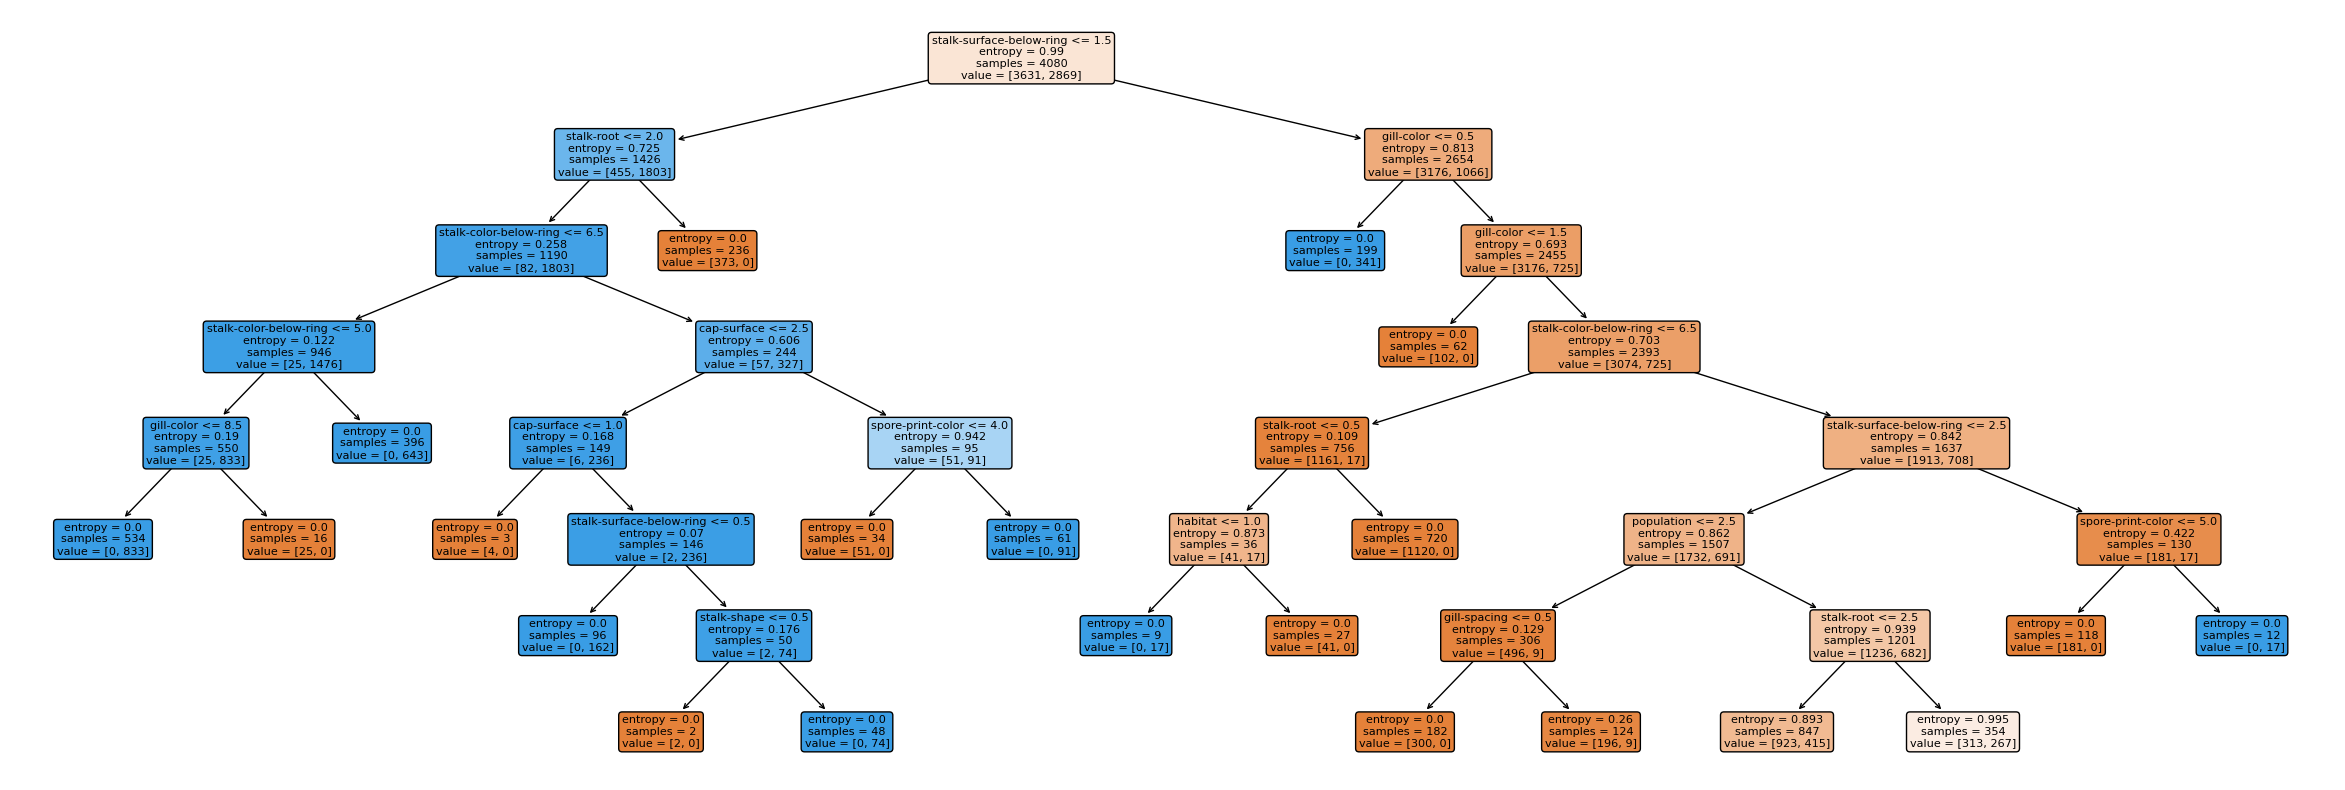

In [36]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(30,10))
feature_names = x_train.columns.to_list()
# return되는 값 안 보고 싶어 -> _ 입력
_ = plot_tree(
    # _(접근제어자): 외부에서의 접근을 피해달라- 라는 의미
    model.estimators_[9],
    # 색깔 칠하기
    # 파랑: 생존 확률이 높은 부분
    filled=True,
    # 네모 모서리 둥글게
    rounded=True,
    # x[7] 이런건 보기 힘드니까 -> 속성 이름 지정
    feature_names=feature_names
)

In [37]:
# stratified KFold validation
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
#     # 트리 개수
    "n_estimators": [10, 20, 30, 50],
#     # 트리 최대 깊이
    "max_depth": [3, 5, 7, 10]
}

In [39]:
grid_search = GridSearchCV(
    estimator=model,     
    param_grid=param_grid,
    cv=stratified_kf
)

In [40]:
param_grid = {
    "n_estimators": [10, 20, 30, 50],
    "max_depth": [3, 5, 7, 10],
    "max_features": [3, 5, 9]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf
)

In [42]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy', max_depth=7,
                                              max_features=3, n_estimators=20,
                                              random_state=1234),
             param_grid={'max_depth': [3, 5, 7, 10], 'max_features': [3, 5, 9],
                         'n_estimators': [10, 20, 30, 50]})

In [43]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 3, 'n_estimators': 10}

In [44]:
grid_search.best_score_

0.9998461538461537

In [45]:
model = RandomForestClassifier(
    n_estimators=30,
    criterion="entropy",
    max_depth=7,
    max_features=3,
    random_state=1234
)

In [46]:
scores = cross_val_score(model, x_train, y_train, cv=stratified_kf)

In [47]:
scores.mean()

0.9996923076923077

In [48]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       n_estimators=30, random_state=1234)

In [49]:
model.feature_importances_

array([0.0049677 , 0.02069613, 0.01922369, 0.04887194, 0.16243985,
       0.0003042 , 0.02881138, 0.05034661, 0.07214733, 0.03396081,
       0.11782049, 0.03321643, 0.07368282, 0.02930919, 0.03213724,
       0.        , 0.        , 0.00780308, 0.02906004, 0.12399891,
       0.06443338, 0.04676879])

In [50]:
ser = pd.Series(model.feature_importances_, index=df.columns[2:])

top10 = ser.sort_values(ascending=False)[:10]
print(top10)

odor                        0.162440
spore-print-color           0.123999
stalk-root                  0.117820
stalk-surface-below-ring    0.073683
gill-color                  0.072147
population                  0.064433
gill-size                   0.050347
bruises                     0.048872
habitat                     0.046769
stalk-shape                 0.033961
dtype: float64


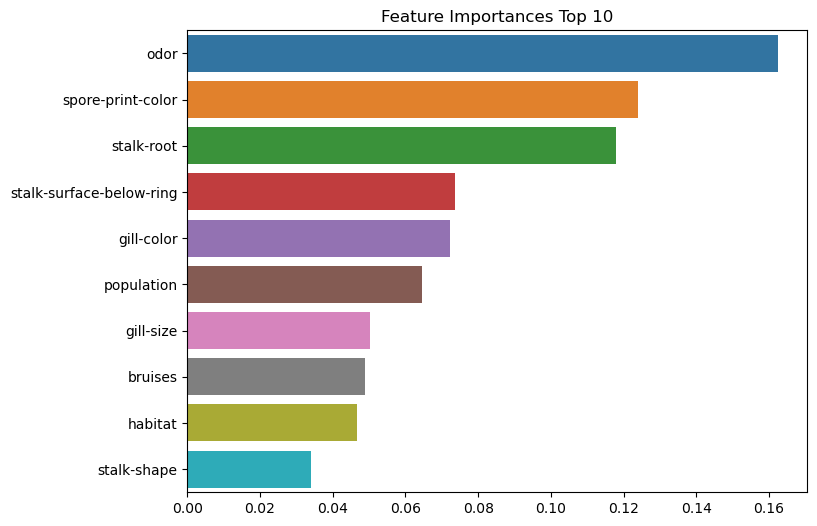

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 10')
sns.barplot(x=top10, y=top10.index)
plt.show()

## RandomForest 제출파일

In [48]:
y_test = model.predict(x_test)

In [49]:
test_df["class"] = y_test

In [50]:
test_df[["mushroom_id", "class"]].to_csv("./data/mushroom_submission.csv", index=False)

## BoostingTree

In [76]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


## lightGBM 모델 학습 및 성능 평가

In [51]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 30],
    "learning_rate": [0.01, 0.001],
    "num_leaves": [10, 20, 30],
    "subsample": [0.8, 1.0]
}

In [53]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

In [54]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf,
    scoring="accuracy"
)
grid_search.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2240, number of negative: 2960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Info] Number of positive: 2240, number of negative: 2960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Info] Nu

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the 

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM]

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Number of positive: 2240, number of negative: 2960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM]

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2240, number of negative: 2960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Number of positive: 2799, number of negative: 3701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430615 -> initscore=-0.279341
[LightGBM] [Info] Start training from score -0.279341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [10, 30], 'num_leaves': [10, 20, 30],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [55]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 30, 'num_leaves': 20, 'subsample': 0.8}

In [56]:
grid_search.best_score_

0.9984615384615385

In [57]:
model = lgb.LGBMClassifier(**grid_search.best_params_)
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2799, number of negative: 3701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430615 -> initscore=-0.279341
[LightGBM] [Info] Start training from score -0.279341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(learning_rate=0.01, n_estimators=30, num_leaves=20,
               subsample=0.8)

## Feature Importance 시각화하기

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

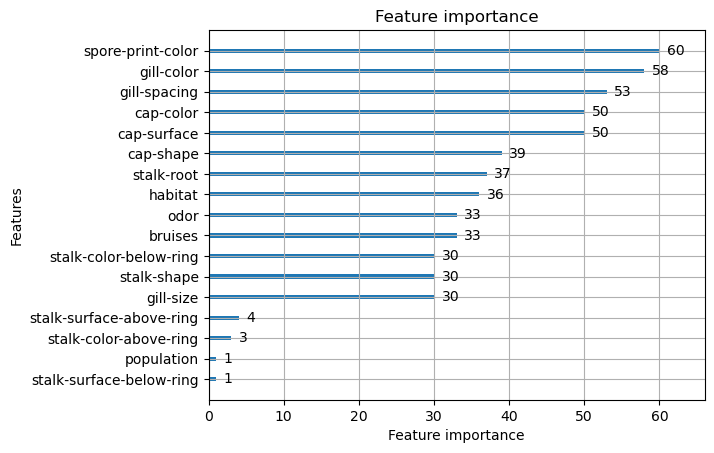

In [58]:
from lightgbm import plot_importance

plot_importance(model)

## BoostingTree 제출파일

In [59]:
y_test = model.predict(x_test)

In [60]:
test_df["class"] = y_test

In [61]:
test_df[["mushroom_id", "class"]].to_csv("./data/submission_mushroom.csv", index=False)